<a href="https://colab.research.google.com/github/eddorileo/saudeDigital/blob/main/src/AnaliseExploratoriaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciência de Dados e Saúde Digital
##Estudo de Caso: Absenteísmo (No-show)
Facilitador: Éderson Dorileo, MSc, PhD


###1. Importação e Limpeza dos Dados

In [71]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Carregar a base de dados
df = pd.read_csv('no_show.csv')

# Visualizar as primeiras linhas da base de dados
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


###2. Tratamento de Dados Nulos e Inconsistências

In [72]:
#deletar colunas desnecessarias
df = df.drop(columns=['PatientId', 'AppointmentID'])

In [73]:
# Verificar valores nulos
#df.isnull().sum()

# Tratar valores nulos (se necessário)
df = df.dropna()

# Exemplo: Verificar idade negativa
df = df[df['Age'] >= 0]

# Verificar duplicatas
df = df.drop_duplicates()

# Transformar a variável categórica 'No-show' em numérica
# # Dados categóricos não são adequados para correlação Pearson
# # Transformação está ok para correlação Spearman (ordinais ou binarios)
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

# # Transformar a variável categórica 'Gender' em numérica
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

# Filtrar colunas numéricas, incluindo a variável target transformada
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Remover valores nulos (se houver) nas colunas numéricas
df_numerical = df[numerical_cols].dropna()



In [74]:
import pandas as pd

data = df

# Converter colunas de data para formato datetime
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Criar a nova coluna 'DaysBetween' com a diferença em dias
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

# Garantir que não haja valores negativos (substituir negativos por zero)
data['DaysBetween'] = data['DaysBetween'].clip(lower=0)

# Reorganizar as colunas, colocando 'No-show' por último
cols = [col for col in data.columns if col != 'No-show'] + ['No-show']
data = data[cols]


# Exibir as primeiras linhas para verificar
#print(data[['ScheduledDay', 'AppointmentDay', 'DaysBetween']].head())




###3. Tabela e seus Elementos

In [75]:
# Converter a variável 'No-show' para binária (1 = Yes, 0 = No)
#data['No-show'] = data['No-show'].map({'Yes': 1, 'No': 0})

# Calcular o describe geral novamente
#describe_geral = data.describe().transpose()
aux = data.drop(columns=['Gender'])
describe_geral = aux.describe().transpose()

# Exibir a tabela
describe_geral


,count,mean,std,min,25%,50%,75%,max
Age,109891.0,37.089853,23.121015,0.0,18.0,37.0,55.0,115.0
Scholarship,109891.0,0.098288,0.297705,0.0,0.0,0.0,0.0,1.0
Hipertension,109891.0,0.197250,0.397924,0.0,0.0,0.0,0.0,1.0
Diabetes,109891.0,0.071826,0.258200,0.0,0.0,0.0,0.0,1.0
Alcoholism,109891.0,0.030430,0.171769,0.0,0.0,0.0,0.0,1.0
Handcap,109891.0,0.022131,0.160879,0.0,0.0,0.0,0.0,4.0
SMS_received,109891.0,0.322884,0.467581,0.0,0.0,0.0,1.0,1.0
DaysBetween,109891.0,9.508258,15.023959,0.0,0.0,3.0,14.0,178.0
No-show,109891.0,0.201090,0.400817,0.0,0.0,0.0,0.0,1.0


In [76]:
df=data

# Convertendo 'AppointmentDay' para datetime e extraindo o dia da semana
# df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
# df['DayOfWeek'] = df['AppointmentDay'].dt.day_name(locale='pt_BR.UTF-8')
df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()


# Mapeando os dias da semana para português (seg, ter, qua, qui, sex)
day_mapping = {
    "Monday": "seg",
    "Tuesday": "ter",
    "Wednesday": "qua",
    "Thursday": "qui",
    "Friday": "sex",
    "Saturday": "sáb",
    "Sunday": "dom"
}
df['DayOfWeek'] = df['DayOfWeek'].map(day_mapping)

# Organizando a tabela para contabilizar "No-show" por dia da semana
table = df.groupby(['DayOfWeek', 'No-show']).size().unstack(fill_value=0)

# Ordenando a tabela pelos dias da semana em ordem crescente
day_order = ["seg", "ter", "qua", "qui", "sex", "sáb", "dom"]
table = table.reindex(day_order)

# Exibindo a tabela
print(table)

No-show          0       1
DayOfWeek                 
seg        17938.0  4635.0
ter        20408.0  5099.0
qua        20686.0  5053.0
qui        13862.0  3312.0
sex        14869.0  3990.0
sáb           30.0     9.0
dom            NaN     NaN


<ipython-input-76-64460c2924ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['AppointmentDay'].dt.day_name()


In [77]:

# Criando a tabela de contingência para "Gender" e "No-show"
contingency_table = pd.crosstab(df['Gender'], df['No-show'])

# Renomeando os rótulos das linhas e colunas
contingency_table.index = ["Mulher", "Homem"]
contingency_table.columns = ["Não", "Sim"]

# Adicionando linha e coluna "Total"
contingency_table["Total"] = contingency_table.sum(axis=1)
total_row = pd.DataFrame(contingency_table.sum(axis=0)).T
total_row.index = ["Total"]
contingency_table = pd.concat([contingency_table, total_row])

# Exibindo a tabela de contingência
print(contingency_table)


          Não    Sim   Total
Mulher  56961  14455   71416
Homem   30832   7643   38475
Total   87793  22098  109891


In [78]:
import pandas as pd

data=df

# Definir os bins de idade em classes de 10 anos, até 130 anos
bins = list(range(0, 131, 10))
data['AgeBin'] = pd.cut(data['Age'], bins=bins, right=False)

# Calcular a frequência absoluta
freq_abs = data['AgeBin'].value_counts(sort=False)

# Calcular a frequência relativa **antes do arredondamento**
freq_rel = (freq_abs / freq_abs.sum()) * 100

# Calcular a frequência acumulada (absoluta)
freq_acum = freq_abs.cumsum()

# Calcular a frequência acumulada **antes do arredondamento**
freq_acum_rel = freq_rel.cumsum()

# **Arredondar somente após o cálculo da frequência acumulada**
freq_rel = freq_rel.round(1)
freq_acum_rel = freq_acum_rel.round(3)

# Corrigir possível erro de arredondamento garantindo que o último valor seja exatamente 100%
freq_acum_rel.iloc[-1] = 100.0

# Criar a tabela de distribuição de frequência
freq_table = pd.DataFrame({
    'Classes (Idade)': [f'{int(bin.left)}-{int(bin.right - 1)}' for bin in freq_abs.index],
    'Absoluta': freq_abs.values,
    'Relativa (%)': freq_rel.values,
    'Acumulada': freq_acum.values,
    'Acumulada (%)': freq_acum_rel.values
})

# Exibir a tabela
print(freq_table)


   Classes (Idade)  Absoluta  Relativa (%)  Acumulada  Acumulada (%)
0              0-9     17406          15.8      17406         15.839
1            10-19     12846          11.7      30252         27.529
2            20-29     13617          12.4      43869         39.920
3            30-39     15049          13.7      58918         53.615
4            40-49     14132          12.9      73050         66.475
5            50-59     15761          14.3      88811         80.817
6            60-69     11828          10.8     100639         91.581
7            70-79      5910           5.4     106549         96.959
8            80-89      2929           2.7     109478         99.624
9            90-99       404           0.4     109882         99.992
10         100-109         5           0.0     109887         99.996
11         110-119         4           0.0     109891        100.000
12         120-129         0           0.0     109891        100.000


In [82]:
abs_count = data[data['No-show'] == 'Yes']

# Calcular a contagem relativa (percentual) com uma casa decimal
#rel_percent = ((abs_count / abs_count.sum()) * 100)
data['No-show']

,No-show
0,0
1,0
2,0
3,0
4,0
...,...
110522,0
110523,0
110524,0
110525,0


In [83]:
import pandas as pd

# Calcular a contagem absoluta de no-shows por bairro
abs_count = data[data['No-show'] == 1]['Neighbourhood'].value_counts()

# Calcular a contagem relativa (percentual) com uma casa decimal
rel_percent = ((abs_count / abs_count.sum()) * 100).round(1)

# Calcular a contagem acumulada (absoluta)
acum_count = abs_count.cumsum()

# Calcular a contagem acumulada (relativa) com uma casa decimal
acum_percent = rel_percent.cumsum() #.round(1)

# Criar a tabela completa de distribuição de frequência
freq_table_noshow_bairro = pd.DataFrame({
    'Bairro': [b[:18] for b in abs_count.index],  # Limita o nome do bairro a 18 caracteres
    'Absoluta': abs_count.values,
    'Relativa (%)': rel_percent.values,
    'Acumulada': acum_count.values,
    'Acumulada (%)': acum_percent.values
})

# Selecionar os Top 10 bairros e os últimos 5
top_10 = freq_table_noshow_bairro.head(10)
bottom_5 = freq_table_noshow_bairro.tail(5)

# Concatenar os resultados para exibição
final_table = pd.concat([top_10, bottom_5])

# Exibir a tabela
#print(final_table)

print(top_10)
print("...")
print(bottom_5)


              Bairro  Absoluta  Relativa (%)  Acumulada  Acumulada (%)
0     JARDIM CAMBURI      1429           6.5       1429            6.5
1        MARIA ORTIZ      1219           5.5       2648           12.0
2            ITARARÉ       902           4.1       3550           16.1
3        RESISTÊNCIA       885           4.0       4435           20.1
4  JESUS DE NAZARETH       695           3.1       5130           23.2
5             CENTRO       695           3.1       5825           26.3
6    JARDIM DA PENHA       631           2.9       6456           29.2
7          CARATOÍRA       583           2.6       7039           31.8
8         TABUAZEIRO       568           2.6       7607           34.4
9             BONFIM       548           2.5       8155           36.9
...
                Bairro  Absoluta  Relativa (%)  Acumulada  Acumulada (%)
75   PONTAL DE CAMBURI        12           0.1      22090           99.7
76         ILHA DO BOI         3           0.0      22093           9

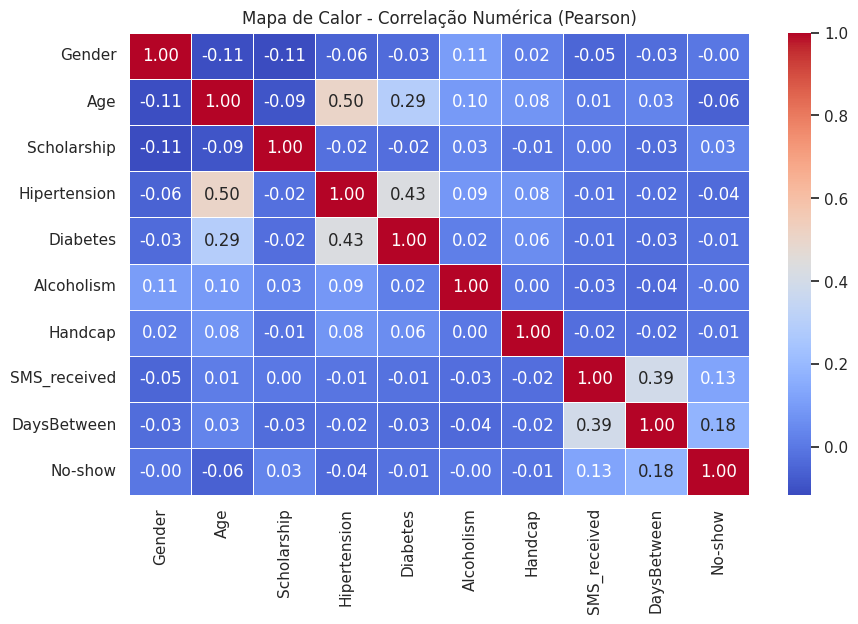

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

# Separar variáveis numéricas e categóricas
num_vars = data.select_dtypes(include=['number'])  # Apenas variáveis numéricas
cat_vars = data.select_dtypes(include=['object'])  # Apenas variáveis categóricas

# Criar matriz de correlação para variáveis numéricas usando Pearson
corr_numeric = num_vars.corr(method='pearson')

# Função para calcular Cramér's V para variáveis categóricas
def cramers_v(x, y):
    """ Calcula a correlação de Cramér entre duas variáveis categóricas """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Criar matriz de correlação para variáveis categóricas
cat_columns = cat_vars.columns
corr_categorical = pd.DataFrame(index=cat_columns, columns=cat_columns, dtype=float)

for col1 in cat_columns:
    for col2 in cat_columns:
        if col1 == col2:
            corr_categorical.loc[col1, col2] = 1.0  # Correlação perfeita consigo mesma
        else:
            corr_categorical.loc[col1, col2] = cramers_v(cat_vars[col1], cat_vars[col2])

# Criar figura para o mapa de calor das variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(corr_numeric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor - Correlação Numérica (Pearson)")
plt.show()

# # Criar figura para o mapa de calor das variáveis categóricas
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr_categorical.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Mapa de Calor - Correlação Categórica (Cramér's V)")
# plt.show()


###4. Gráficos de Variáveis Qualitativas

A representação gráfica da distribuição de uma
variável tem a vantagem de, rápida e concisamente, informar sobre sua variabilidade. Existem
vários gráficos que podem ser utilizados e abordaremos aqui os mais simples para
variáveis qualitativas.


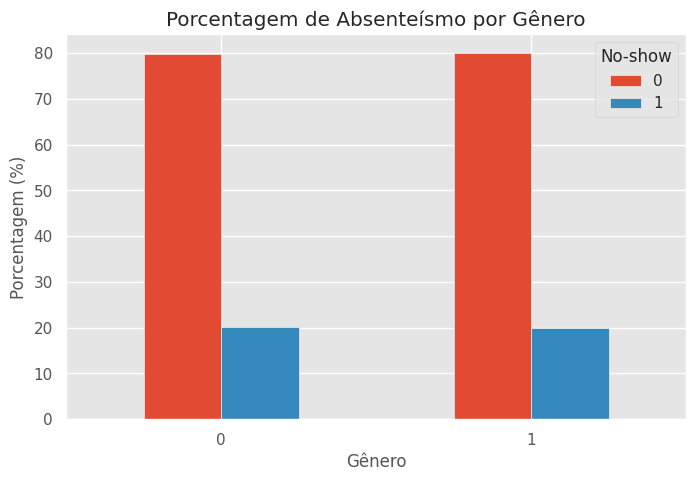

In [86]:
# Configuração global para melhorar a aparência dos gráficos
plt.style.use('ggplot')

# Gráfico de Barras - Gênero x Absenteísmo (em porcentagem)
gender_no_show = data.groupby(['Gender', 'No-show']).size().unstack()
gender_no_show_percentage = gender_no_show.div(gender_no_show.sum(axis=1), axis=0) * 100
gender_no_show_percentage.plot(kind='bar', figsize=(8, 5))
plt.title('Porcentagem de Absenteísmo por Gênero')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Gênero')
plt.xticks(rotation=0)
plt.legend(title='No-show')
plt.show()


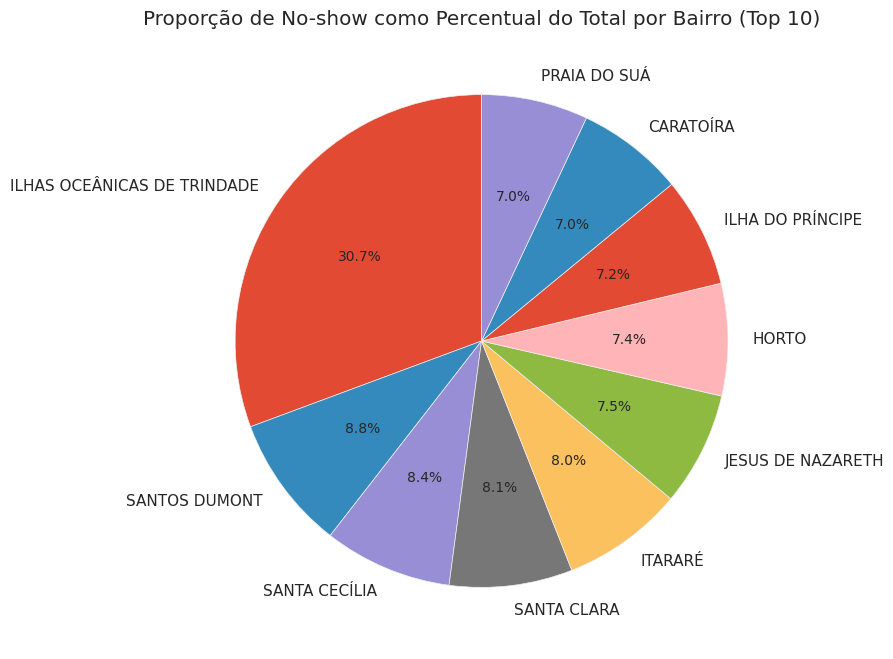

In [129]:

# Gráfico de Pizza - Proporção de No-show como porcentagem do total de pacientes por bairro
no_show_percentage_by_neighbourhood = (
    data[data['No-show'] == 1]['Neighbourhood'].value_counts() /
    data['Neighbourhood'].value_counts()
).sort_values(ascending=False).head(10) * 100

no_show_percentage_by_neighbourhood.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Proporção de No-show como Percentual do Total por Bairro (Top 10)')
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.show()


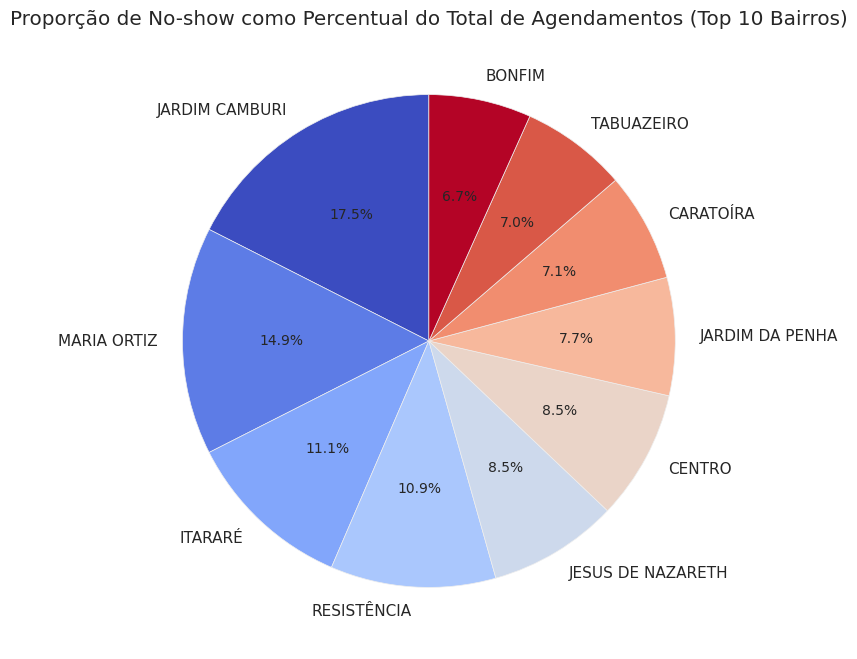

In [131]:
import matplotlib.pyplot as plt

# Calcular a porcentagem de no-show em relação ao total de agendamentos por bairro
no_show_percentage_by_neighbourhood = (
    data[data['No-show'] == 1]['Neighbourhood'].value_counts()
    / data.shape[0]
).sort_values(ascending=False).head(10) * 100

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
no_show_percentage_by_neighbourhood.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False, cmap='coolwarm')

# Ajustar título e remover rótulo do eixo Y
plt.title('Proporção de No-show como Percentual do Total de Agendamentos (Top 10 Bairros)')
plt.ylabel('')

# Exibir gráfico
plt.show()


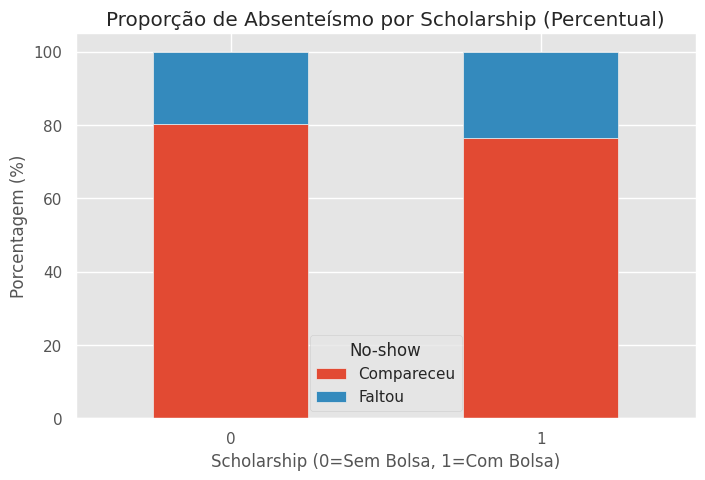

In [ ]:

# Gráfico de Colunas Empilhadas - Scholarship x No-show (em porcentagem)
scholarship_no_show = data.groupby(['Scholarship', 'No-show']).size().unstack()
scholarship_no_show_percentage = scholarship_no_show.div(scholarship_no_show.sum(axis=1), axis=0) * 100

scholarship_no_show_percentage.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Proporção de Absenteísmo por Scholarship (Percentual)')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Scholarship (0=Sem Bolsa, 1=Com Bolsa)')
plt.xticks(rotation=0)
plt.legend(title='No-show')
plt.show()


###5. Gráficos de Variáveis Quantitativas
####Histograma:
Representação gráfica em colunas de um conjunto de dados previamente tabulado e dividido em classes uniformes ou não uniformes

* A área do histograma é proporcional à soma das frequencias
* No caso de frequencias relativas, a área será igual a 100%
* Caso o objetivo seja comparar frequências, o ideal é sempre usar histogramas de frequências relativas

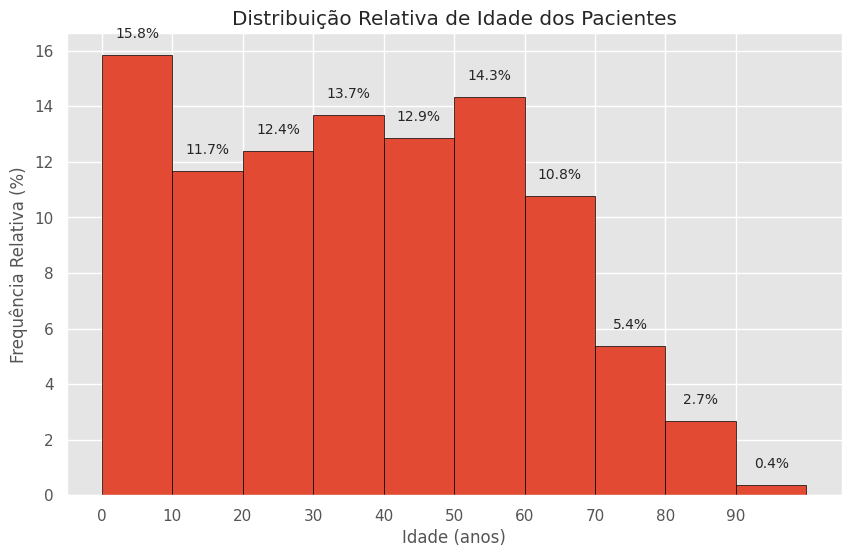

In [ ]:
# Histograma - Distribuição Relativa de Idade dos Pacientes com Valores no Topo
bins = list(range(0, 101, 10))  # Intervalos de idade de 10 em 10 anos
age_bins = pd.cut(data['Age'], bins=bins, right=False)  # Classifica as idades nos intervalos
age_relative_freq = age_bins.value_counts(sort=False, normalize=True) * 100  # Frequência relativa em porcentagem

# Plotar o histograma com bins contíguos
plt.figure(figsize=(10, 6))
bars = plt.bar(
    x=[int(edge) for edge in bins[:-1]],  # Posição central de cada bin
    height=age_relative_freq.values,  # Altura das barras
    width=10,  # Largura das barras igual ao intervalo
    align='edge',  # Alinhar as barras à borda esquerda do intervalo
    edgecolor='black'
)

# Adicionar os valores no topo de cada barra
for bar, value in zip(bars, age_relative_freq.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição central da barra
        bar.get_height() + 0.5,  # Posição logo acima do topo da barra
        f'{value:.1f}%',  # Valor formatado como percentual
        ha='center', va='bottom', fontsize=10
    )

plt.title('Distribuição Relativa de Idade dos Pacientes')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência Relativa (%)')
plt.xticks(ticks=[int(edge) for edge in bins[:-1]], labels=[str(int(edge)) for edge in bins[:-1]], rotation=0)
plt.show()


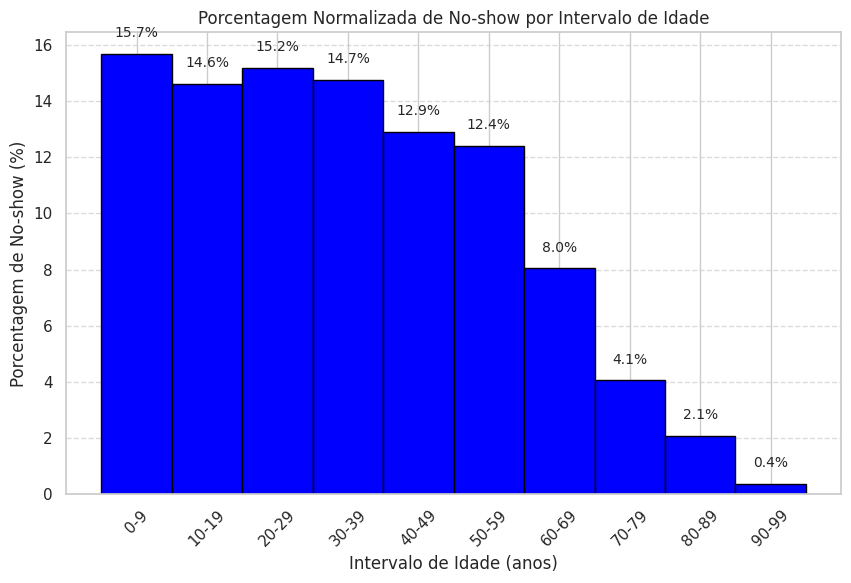

In [ ]:
# Histograma - Porcentagem Normalizada de No-show por Intervalo de Idade (Bins Contíguos)
bins = list(range(0, 101, 10))  # Intervalos de idade de 10 em 10 anos
data['AgeBin'] = pd.cut(data['Age'], bins=bins, right=False)  # Classifica as idades nos intervalos

# Calculando a porcentagem de no-show para cada faixa etária em relação ao total de no-shows
total_no_shows = data[data['No-show'] == 'Yes'].shape[0]  # Total de no-shows no dataset
no_show_normalized_percentage_by_age = (
    data[data['No-show'] == 'Yes'].groupby('AgeBin', observed=False).size() / total_no_shows
) * 100

# Remover bins vazios (NaN)
no_show_normalized_percentage_by_age = no_show_normalized_percentage_by_age.dropna()

# Plotando o histograma com bins contíguos
plt.figure(figsize=(10, 6))
bars = plt.bar(
    x=range(len(no_show_normalized_percentage_by_age)),  # Posição dos bins como índices contíguos
    height=no_show_normalized_percentage_by_age.values,  # Porcentagens normalizadas
    width=1.0,  # Largura máxima para contiguidade
    color='blue', edgecolor='black'
)

# Adicionando as porcentagens no topo de cada barra
for bar, value in zip(bars, no_show_normalized_percentage_by_age.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f'{value:.1f}%',
        ha='center', va='bottom', fontsize=10
    )

plt.title('Porcentagem Normalizada de No-show por Intervalo de Idade')
plt.xlabel('Intervalo de Idade (anos)')
plt.ylabel('Porcentagem de No-show (%)')
plt.xticks(
    ticks=range(len(no_show_normalized_percentage_by_age)),
    labels=[f'{int(bin.left)}-{int(bin.right - 1)}' for bin in no_show_normalized_percentage_by_age.index],
    rotation=45
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-29-382cf71bebde>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[data['No-show'] == 'Yes'].groupby('AgeBin').size() /
<ipython-input-29-382cf71bebde>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[data['No-show'] == 'No'].groupby('AgeBin').size()


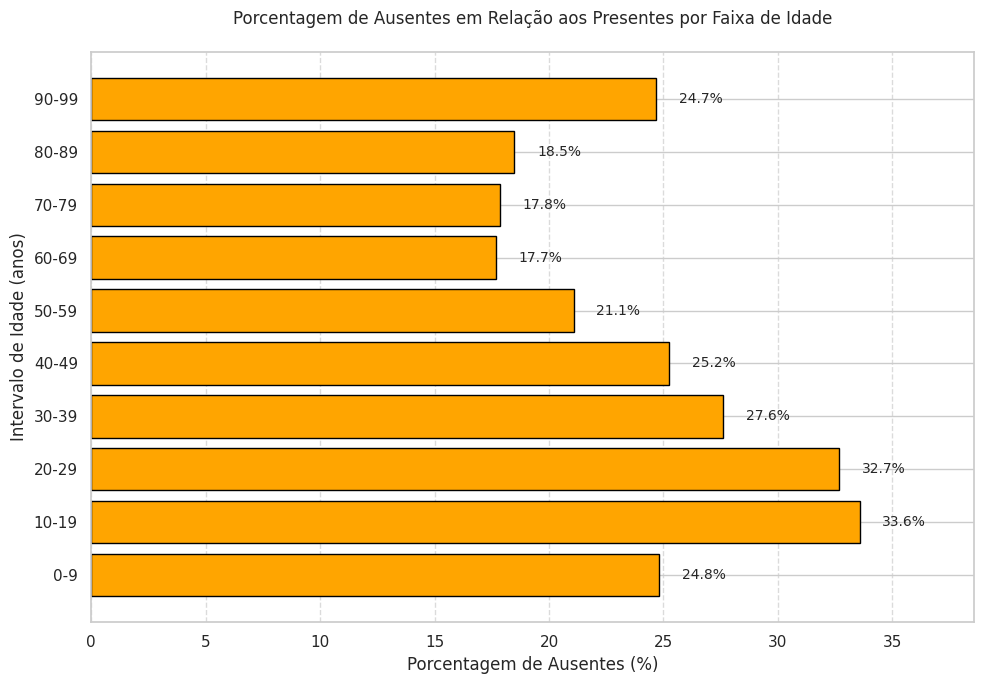

In [ ]:
# Gráfico de Barras Horizontal - Porcentagem de Ausentes em Relação aos Presentes por Faixa de Idade
bins = list(range(0, 101, 10))  # Intervalos de idade de 10 em 10 anos
data['AgeBin'] = pd.cut(data['Age'], bins=bins, right=False)  # Classifica as idades nos intervalos

# Calculando a porcentagem de ausentes em relação aos presentes para cada faixa etária
absent_present_percentage = (
    data[data['No-show'] == 'Yes'].groupby('AgeBin').size() /
    data[data['No-show'] == 'No'].groupby('AgeBin').size()
).fillna(0) * 100  # Converte para porcentagem

# Plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 7))  # Aumentando o espaço horizontal do gráfico
bars = plt.barh(
    y=range(len(absent_present_percentage)),  # Posição dos bins como índices contíguos
    width=absent_present_percentage.values,  # Porcentagem entre ausentes e presentes
    height=0.8,  # Altura das barras
    color='orange', edgecolor='black'
)

# Adicionando as porcentagens no final de cada barra
for bar, value in zip(bars, absent_present_percentage.values):
    plt.text(
        bar.get_width() + 1,  # Adiciona espaço ao final da barra
        bar.get_y() + bar.get_height() / 2,
        f'{value:.1f}%',  # Formata como porcentagem com uma casa decimal
        ha='left', va='center', fontsize=10
    )

# Ajustando o layout do gráfico
plt.title('Porcentagem de Ausentes em Relação aos Presentes por Faixa de Idade', pad=20)  # Adiciona espaço acima do gráfico
plt.xlabel('Porcentagem de Ausentes (%)')
plt.ylabel('Intervalo de Idade (anos)')
plt.yticks(
    ticks=range(len(absent_present_percentage)),
    labels=[f'{int(bin.left)}-{int(bin.right - 1)}' for bin in absent_present_percentage.index]
)
plt.xlim(right=max(absent_present_percentage.values) + 5)  # Ajusta o limite do eixo X
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Garante melhor uso do espaço
plt.show()


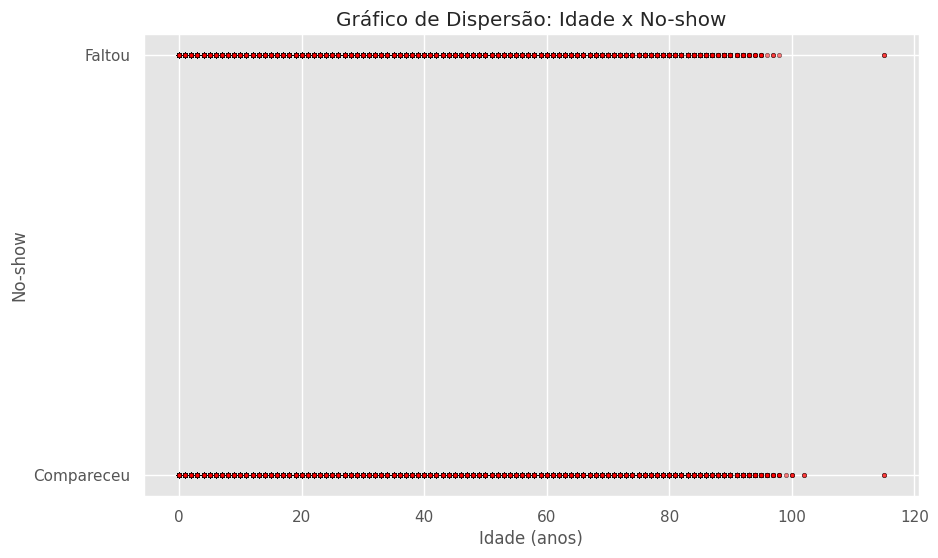

In [ ]:
# [NAO RECOMENDADO]: Gráfico de Dispersão - Idade x No-show
plt.figure(figsize=(10, 6))
plt.scatter(
    x=data['Age'],                       # Idade no eixo X
    y=data['No-show'].map({'Faltou': 1, 'Compareceu': 0}),  # No-show mapeado para 0 e 1
    alpha=0.5,                           # Transparência para melhor visualização
    color='red',                         # Cor dos pontos
    edgecolor='black',                   # Contorno dos pontos
    s=10                                 # Tamanho dos pontos
)
plt.title('Gráfico de Dispersão: Idade x No-show')
plt.xlabel('Idade (anos)')
plt.ylabel('No-show')
plt.yticks([0, 1], labels=['Compareceu', 'Faltou'])  # Rotulando o eixo Y
plt.grid(True)
plt.show()


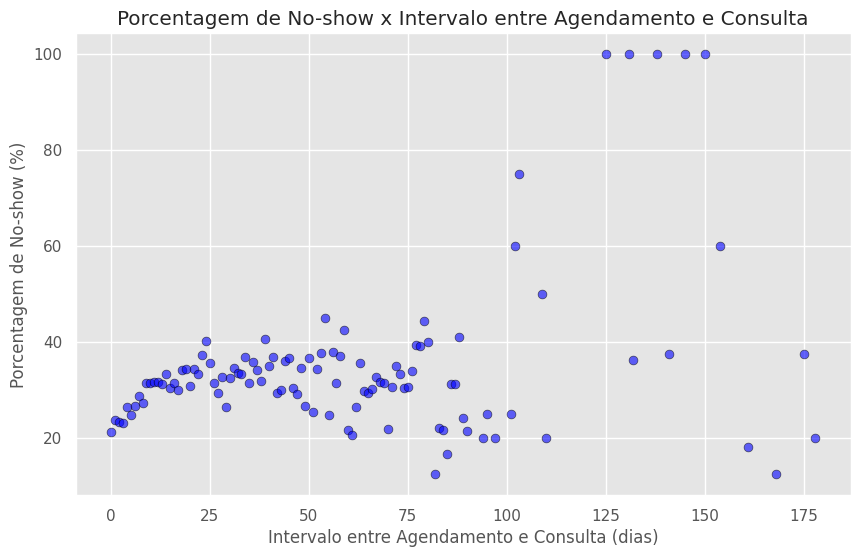

In [ ]:
# Gráfico de Dispersão - Porcentagem de No-show x Intervalo entre Agendamento e Consulta
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])  # Convertendo para datetime
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])  # Convertendo para datetime
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days  # Calculando o intervalo de dias

# Calculando a porcentagem de no-show para cada intervalo de dias
no_show_percentage_by_days = (
    data[data['No-show'] == 'Faltou'].groupby('DaysBetween').size() /
    data.groupby('DaysBetween').size()
) * 100

# Filtrando para intervalos de dias não negativos
no_show_percentage_by_days = no_show_percentage_by_days[no_show_percentage_by_days.index >= 0]

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(
    x=no_show_percentage_by_days.index,  # Intervalo de dias no eixo X
    y=no_show_percentage_by_days.values,  # Porcentagem de no-show no eixo Y
    alpha=0.6,                           # Transparência
    color='blue',                        # Cor dos pontos
    edgecolor='black',                   # Contorno dos pontos
    s=40                                 # Tamanho dos pontos
)
plt.title('Porcentagem de No-show x Intervalo entre Agendamento e Consulta')
plt.xlabel('Intervalo entre Agendamento e Consulta (dias)')
plt.ylabel('Porcentagem de No-show (%)')
plt.grid(True)
plt.show()


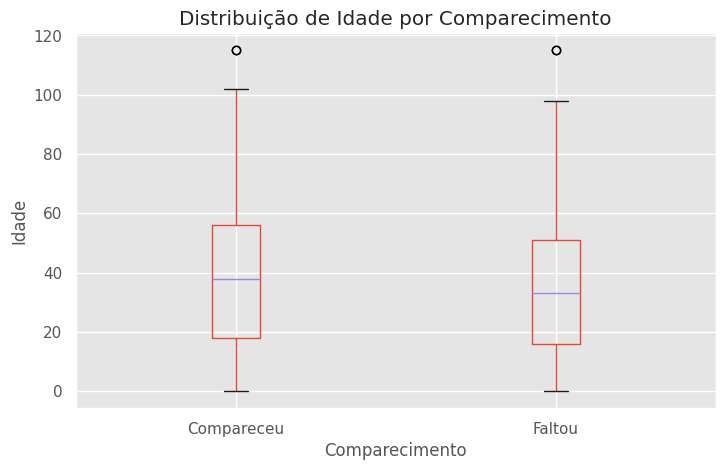

In [ ]:
# Boxplot - Idade por No-show
data.boxplot(column='Age', by='No-show', figsize=(8, 5))
plt.title('Distribuição de Idade por Comparecimento')
plt.suptitle('')  # Remove título automático
plt.xlabel('Comparecimento')
plt.ylabel('Idade')
plt.show()




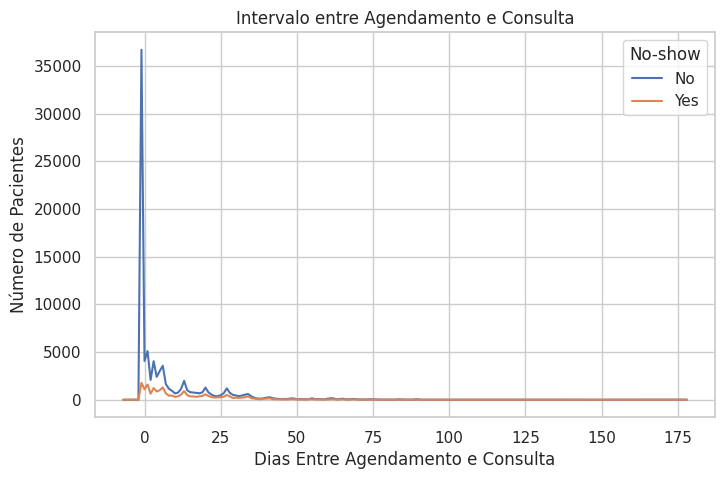

In [ ]:
# Gráfico de Linha - Intervalo entre Agendamento e Consulta
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days
days_between = data.groupby('DaysBetween')['No-show'].value_counts().unstack().fillna(0)
days_between.plot(kind='line', figsize=(8, 5))
plt.title('Intervalo entre Agendamento e Consulta')
plt.xlabel('Dias Entre Agendamento e Consulta')
plt.ylabel('Número de Pacientes')
plt.legend(title='No-show')
plt.show()

<ipython-input-12-b437e1a500be>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('DaysBetweenBin').size() /


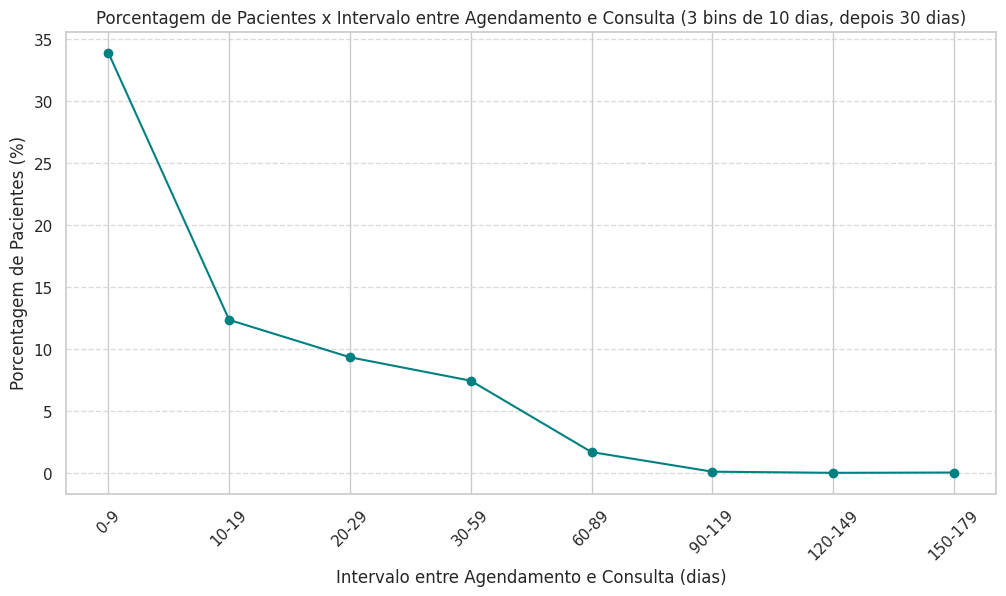

In [ ]:
# Gráfico de Linhas - Porcentagem de Pacientes x Intervalo entre Agendamento e Consulta (3 bins de 10 dias, depois 30 dias)
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])  # Convertendo para datetime
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])  # Convertendo para datetime
data['DaysBetween'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days  # Calculando o intervalo de dias

# Criando bins personalizados (3 primeiros de 10 dias, depois a cada 30 dias, sem duplicar bordas)
bins = [0, 10, 20, 30] + list(range(60, data['DaysBetween'].max() + 30, 30))
data['DaysBetweenBin'] = pd.cut(data['DaysBetween'], bins=bins, right=False)

# Calculando a porcentagem de pacientes para cada intervalo
patients_percentage_by_custom_bins = (
    data.groupby('DaysBetweenBin').size() /
    len(data)
) * 100

# Gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(
    [f'{int(bin.left)}-{int(bin.right - 1)}' for bin in patients_percentage_by_custom_bins.index],  # Rótulos dos bins
    patients_percentage_by_custom_bins.values,
    marker='o', linestyle='-', color='teal'
)
plt.title('Porcentagem de Pacientes x Intervalo entre Agendamento e Consulta (3 bins de 10 dias, depois 30 dias)')
plt.xlabel('Intervalo entre Agendamento e Consulta (dias)')
plt.ylabel('Porcentagem de Pacientes (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()
